In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
#pd.set_option('display.max_columns',None)
%matplotlib inline

In [3]:
# Read the data
df_car = pd.read_csv(r'C:\Users\Viswa\OneDrive\Desktop\carpre.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_car.shape

(205, 26)

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car_company = df_car["CarName"].str.split(" ", n = 1, expand = True)
df_car['CarCompany'] = car_company[0]

# Dropping 'CarName' column
df_car.drop('CarName',axis=1,inplace=True)
df_car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:

df_car.drop('car_ID',axis=1,inplace=True)

In [9]:

df_car.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

In [10]:
#Replacing '4wd' with 'fwd' in 'drivewheel' column
df_car['drivewheel'] = df_car['drivewheel'].replace('4wd','fwd')
# Replacing 'maxda' with 'mazda' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('maxda','mazda')
# Replacing 'porcshce' with 'porsche' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('porcshce','porsche')
# Replacing 'toyouta' with 'toyota' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('toyouta','toyota')
# Replacing 'vokswagen' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vokswagen','volkswagen')
# Replacing 'Nisaan' with 'nissan' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('Nissan','nissan')
# Replacing 'vw' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vw','volkswagen')

In [11]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric: 
    q1 = df_car[col].quantile(0.25)
    q3 = df_car[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_car = df_car.loc[(df_car[col] > range_low) & (df_car[col] < range_high)]

df_car.shape

(123, 25)

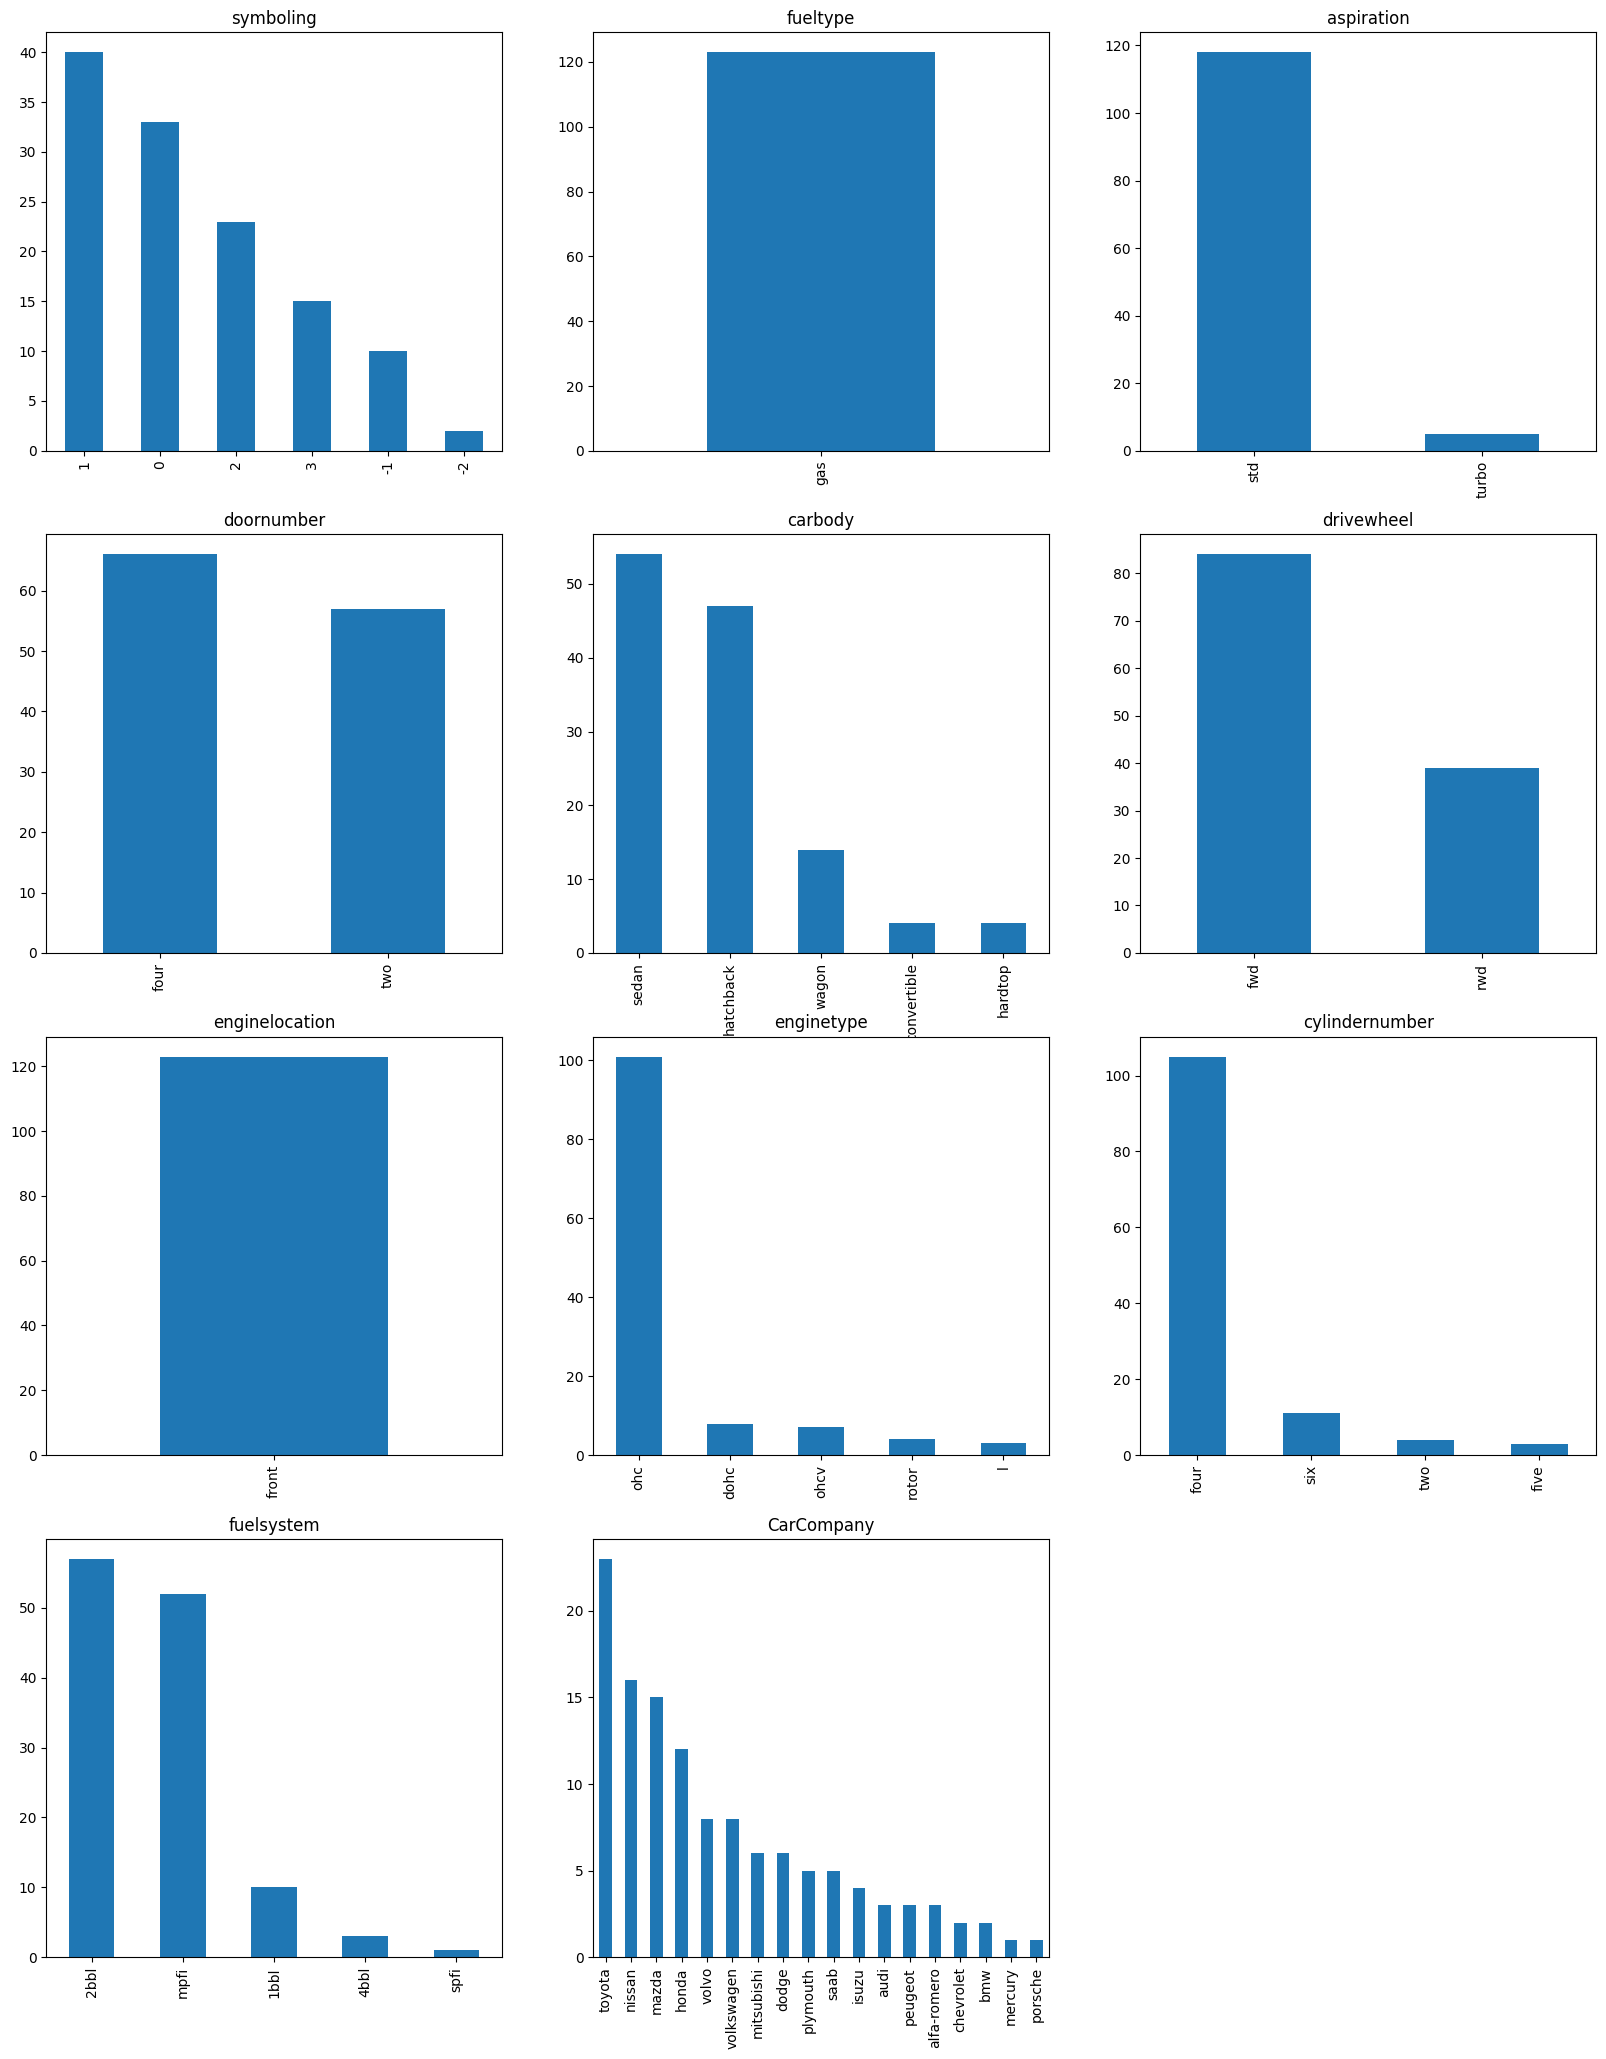

In [12]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
           'cylindernumber','fuelsystem','CarCompany']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_car[col].value_counts().plot(kind='bar');
    plt.title(col)

<Figure size 1200x1200 with 0 Axes>

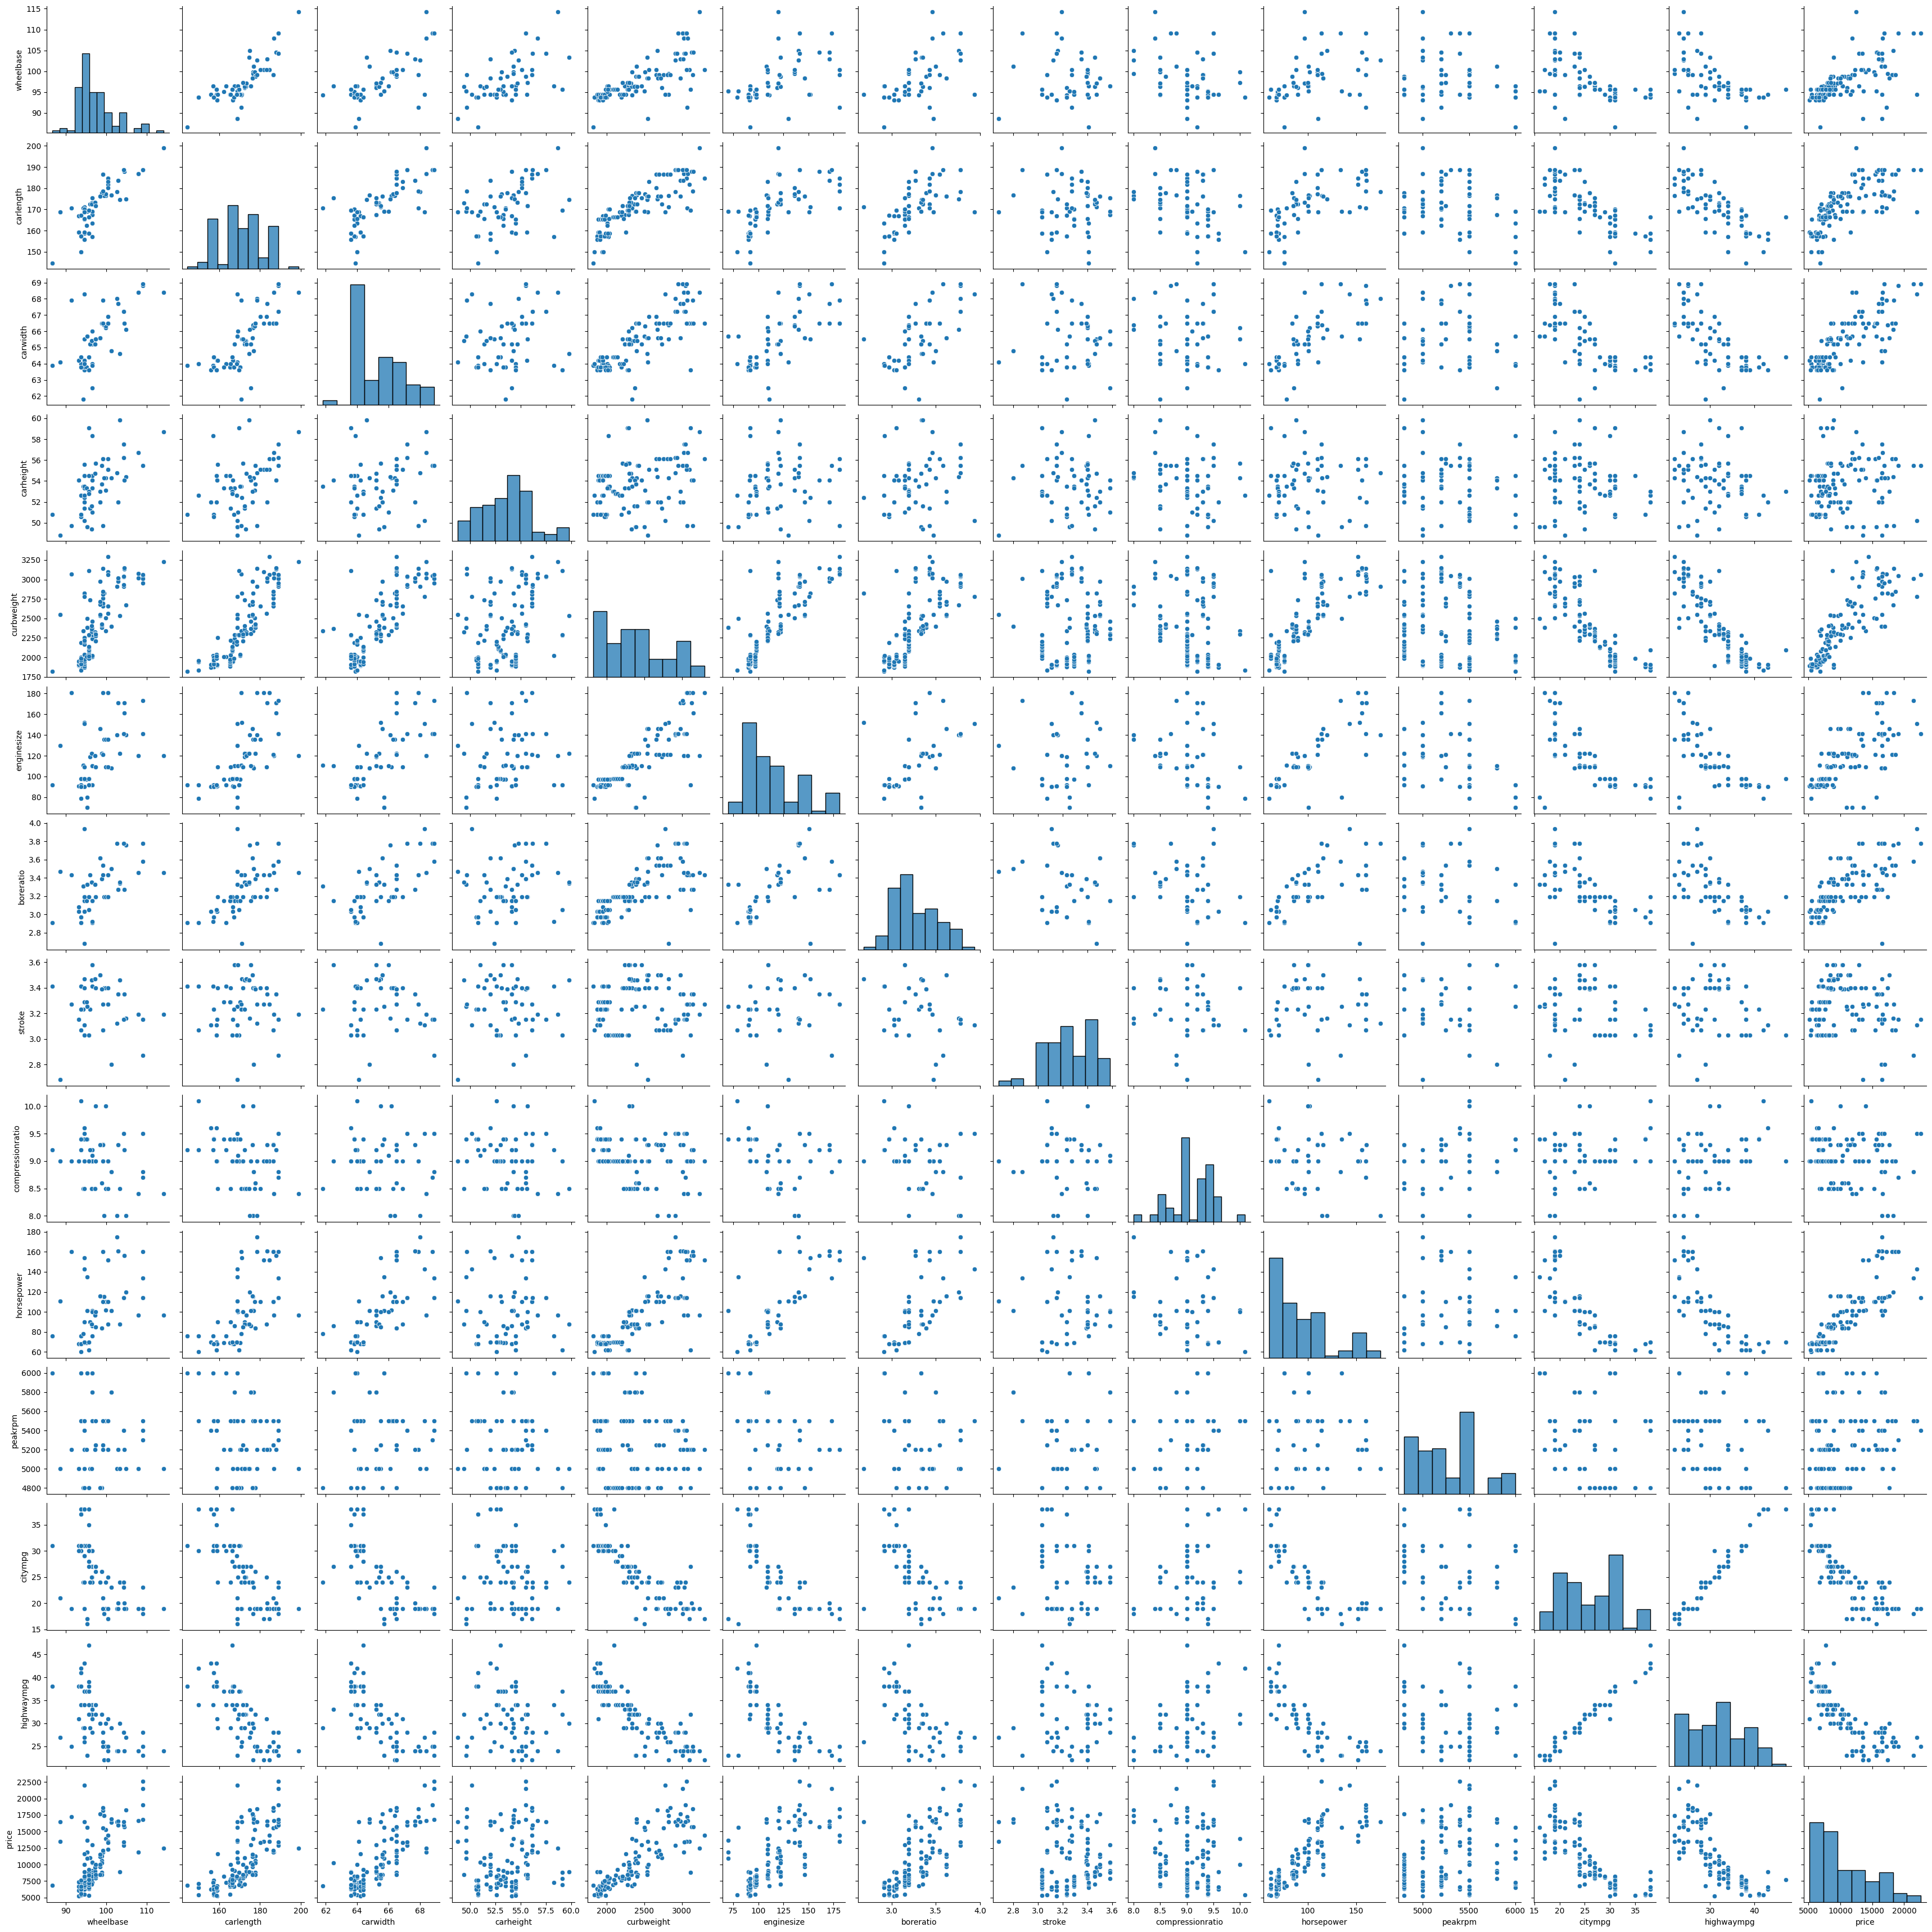

In [13]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(df_car[col_numeric])
plt.show()

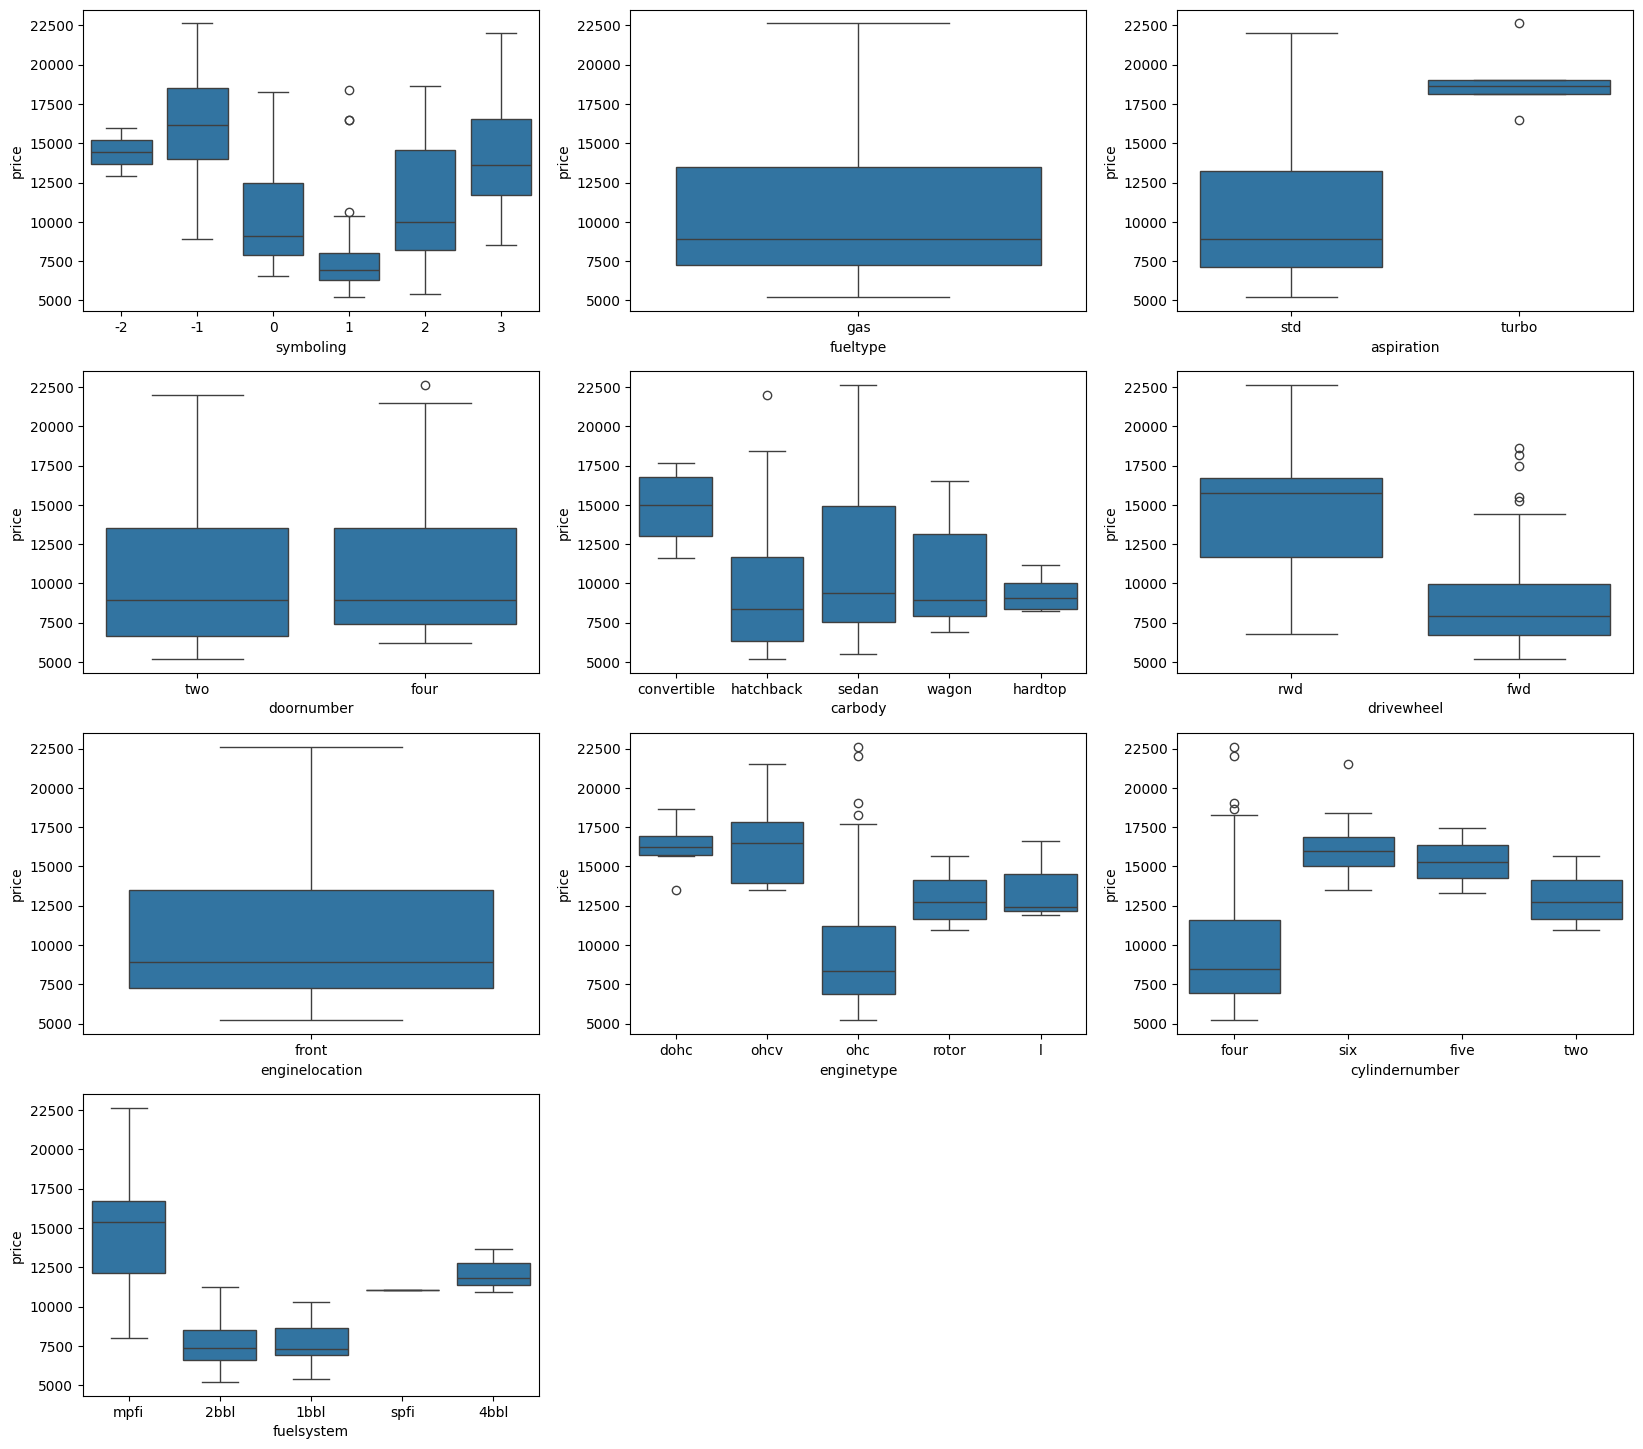

In [14]:
# Boxplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'price', data = df_car)

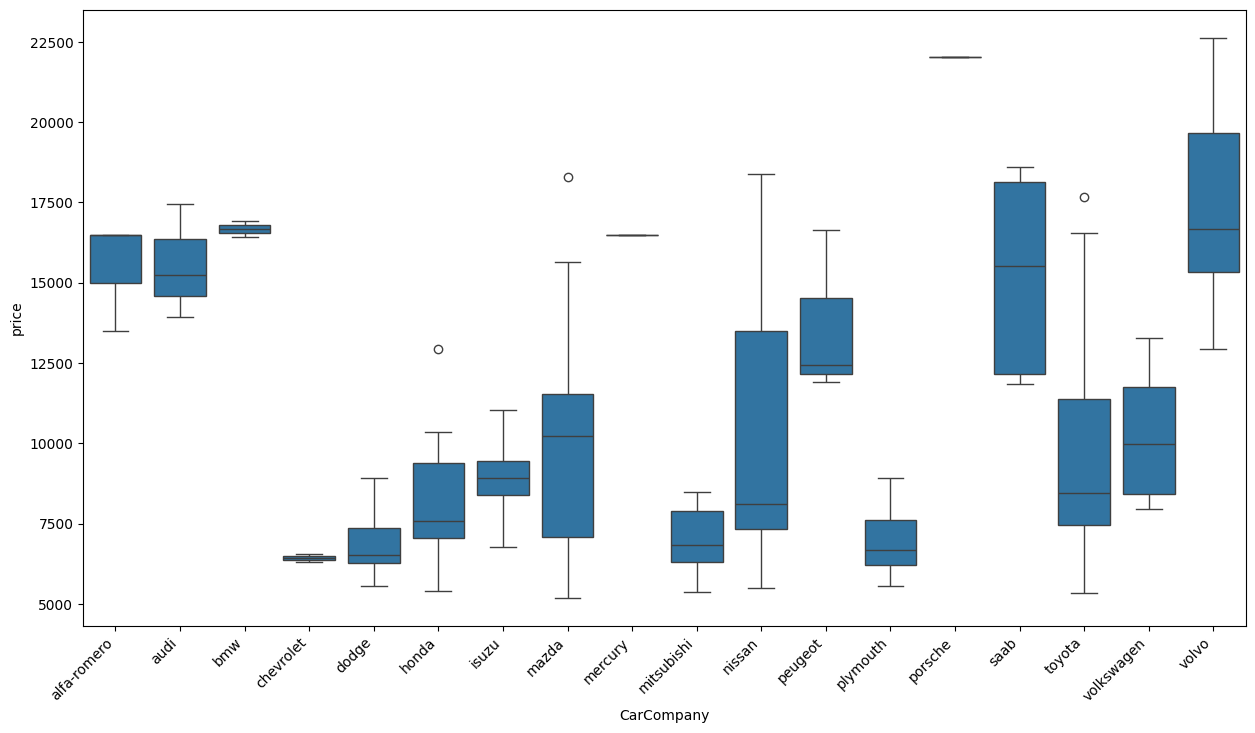

In [15]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'CarCompany', y = 'price', data = df_car)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [16]:
# fueltype
# Convert "gas" to 1 and "diesel" to 0
df_car['fueltype'] = df_car['fueltype'].map({'gas': 1, 'diesel': 0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,std,four,sedan,fwd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
# aspiration
# Convert "std" to 1 and "turbo" to 0
df_car['aspiration'] = df_car['aspiration'].map({'std':1, 'turbo':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,four,sedan,fwd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
# doornumber
# Convert "four" to 1 and "two" to 0
df_car['doornumber'] = df_car['doornumber'].map({'four':1, 'two':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,fwd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [19]:
# drivewheel
# Convert "fwd" to 1 and "rwd" to 0
df_car['drivewheel'] = df_car['drivewheel'].map({'fwd':1, 'rwd':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
# enginelocation
# Convert "front" to 1 and "rear" to 0
df_car['enginelocation'] = df_car['enginelocation'].map({'front':1, 'rear':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


***symboling***

In [21]:
# Creating dummy variables for 'symboling'
# Dropping the redundant dummy variable (-2)
symboling_status = pd.get_dummies(df_car['symboling'],drop_first=True)
symboling_status.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [22]:
# Renaming column names for better readability
symboling_status = symboling_status.rename(columns={-1:'symboling(-1)', 0:'symboling(0)', 1:'symboling(1)',2:'symboling(2)', 3:'symboling(3)'})
symboling_status.head()


,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [23]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,symboling_status], axis=1)
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,...,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,...,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,...,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,...,5500,24,30,13950.0,audi,0,0,0,1,0
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,...,5500,18,22,17450.0,audi,0,0,0,1,0


In [24]:
# Dropping the 'symboling' column as we don't need it anymore
df_car = df_car.drop('symboling',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,...,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,...,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,...,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,...,5500,24,30,13950.0,audi,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,...,5500,18,22,17450.0,audi,0,0,0,1,0


***carbody***

In [25]:
# Creating dummy variables for 'carbody'
# Dropping the redundant dummy variable (convertible)
carbody_status = pd.get_dummies(df_car['carbody'],drop_first=True)
carbody_status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [26]:
# Renaming column names for better readability
carbody_status = carbody_status.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)', 'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
carbody_status.head()

,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [27]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,carbody_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,...,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,...,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,...,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,...,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,...,audi,0,0,0,1,0,0,0,1,0


In [28]:
# Dropping the 'symboling' column as we don't need it
df_car = df_car.drop('carbody',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,audi,0,0,0,1,0,0,0,1,0


In [29]:
# Creating dummy variables for 'enginetype'
# Dropping the redundant dummy variable (dohc)
enginetype_status = pd.get_dummies(df_car['enginetype'], drop_first=True)
enginetype_status.head()

,l,ohc,ohcv,rotor
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [30]:
# Renaming column name for better readability
enginetype_status = enginetype_status.rename(columns={'dohcv':'enginetype(dohcv)', 'l':'enginetype(l)', 'ohc':'enginetype(ohc)', 
                                                      'ohcf':'enginetype(ohcf)','ohcv':'enginetype(ohcv)' ,'rotor':'enginetype(rotor)'})
enginetype_status.head()

,enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [31]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,enginetype_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,1,0,0


In [32]:
# Dropping the 'enginetype' column as we don't need it
df_car = df_car.drop('enginetype',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,1,0,0


***cylindernumber***

In [33]:
# Creating dummy variables for 'cylindernumber'
# Dropping the redundant dummy variable (eight)
cylindernumber_status = pd.get_dummies(df_car['cylindernumber'], drop_first=True)
cylindernumber_status.head()

,four,six,two
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [34]:
# Renaming column name for better readability
cylindernumber_status = cylindernumber_status.rename(columns={'five':'cylindernumber(five)', 'four':'cylindernumber(four)', 'six':'cylindernumber(six)', 
                                                      'three':'cylindernumber(three)','twelve':'cylindernumber(twelve)' ,'two':'cylindernumber(two)'})
cylindernumber_status.head()

,cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [35]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,cylindernumber_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,1,0,0,0,0,0


In [36]:
# Dropping the 'cylindernumber' column as we don't need it
df_car = df_car.drop('cylindernumber',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,1,0,0,0,0,0


***fuelsystem***

In [37]:
# Creating dummy variables for 'fuelsystem'
# Dropping the redundant dummy variable (1bbl)
fuelsystem_status = pd.get_dummies(df_car['fuelsystem'], drop_first=True)
fuelsystem_status.head()

,2bbl,4bbl,mpfi,spfi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [38]:
# Renaming column name for better readability
fuelsystem_status = fuelsystem_status.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 
                                                      'mfi':'fuelsystem(mfi)','mpfi':'fuelsystem(mpfi)' ,'spdi':'fuelsystem(spdi)',
                                                             'spfi':'fuelsystem(spfi)'})
fuelsystem_status.head()

,fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [39]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,fuelsystem_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,0,0,1,0


In [40]:
# Dropping the 'fuelsystem' column as we don't need it
df_car = df_car.drop('fuelsystem',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,0,0,1,0


In [41]:
# Creating dummy variables for 'CarCompany'
# Dropping the redundant dummy variable (alfa-romero)
CarCompany_status = pd.get_dummies(df_car['CarCompany'], drop_first=True)
CarCompany_status.head()

,audi,bmw,chevrolet,dodge,honda,isuzu,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,saab,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Renaming column name for better readability
CarCompany_status = CarCompany_status.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 
                                                      'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)',
                                                      'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)','mazda':'CarCompany(mazda)',
                                                      'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)',
                                                      'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)',
                                                      'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)',
                                                      'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
                                                    
CarCompany_status.head()

,CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,CarCompany_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping the 'CarCompany' column as we don't need it
df_car = df_car.drop('CarCompany',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fueltype                123 non-null    int64  
 1   aspiration              123 non-null    int64  
 2   doornumber              123 non-null    int64  
 3   drivewheel              123 non-null    int64  
 4   enginelocation          123 non-null    int64  
 5   wheelbase               123 non-null    float64
 6   carlength               123 non-null    float64
 7   carwidth                123 non-null    float64
 8   carheight               123 non-null    float64
 9   curbweight              123 non-null    int64  
 10  enginesize              123 non-null    int64  
 11  boreratio               123 non-null    float64
 12  stroke                  123 non-null    float64
 13  compressionratio        123 non-null    float64
 14  horsepower              123 non-null    in

In [46]:
# Splitting train and test dataset into 70:30 percent ratio.
df_train, df_test = train_test_split(df_car, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(86, 56)
(37, 56)


In [47]:
# Create a list of numeric variables. We don't need categorical variables because they are already scalled in 0 and 1.
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# Instantiate an object
scaler = MinMaxScaler()

# Fit the data in the object
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,...,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,...,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,...,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,...,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,...,0,0,0,0,0,0,0,0,0,0


We can see that all the variables are scaled in a range between 0 to 1.

In [48]:
df_train.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
count,86.0,86.00000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,1.0,0.94186,0.511628,0.709302,1.0,0.378202,0.468393,0.285871,0.415856,0.369464,...,0.011628,0.069767,0.139535,0.011628,0.05814,0.011628,0.034884,0.197674,0.046512,0.05814
std,0.0,0.23538,0.502797,0.456748,0.0,0.162068,0.198184,0.269247,0.226509,0.273911,...,0.107833,0.256249,0.348536,0.107833,0.23538,0.107833,0.184561,0.400581,0.211825,0.23538
min,1.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,1.00000,0.000000,0.000000,1.0,0.286232,0.354972,0.042453,0.240909,0.125931,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.0,1.00000,1.000000,1.000000,1.0,0.329710,0.449355,0.188679,0.395455,0.323968,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.0,1.00000,1.000000,1.000000,1.0,0.442029,0.587477,0.438679,0.543182,0.549425,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.0,1.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


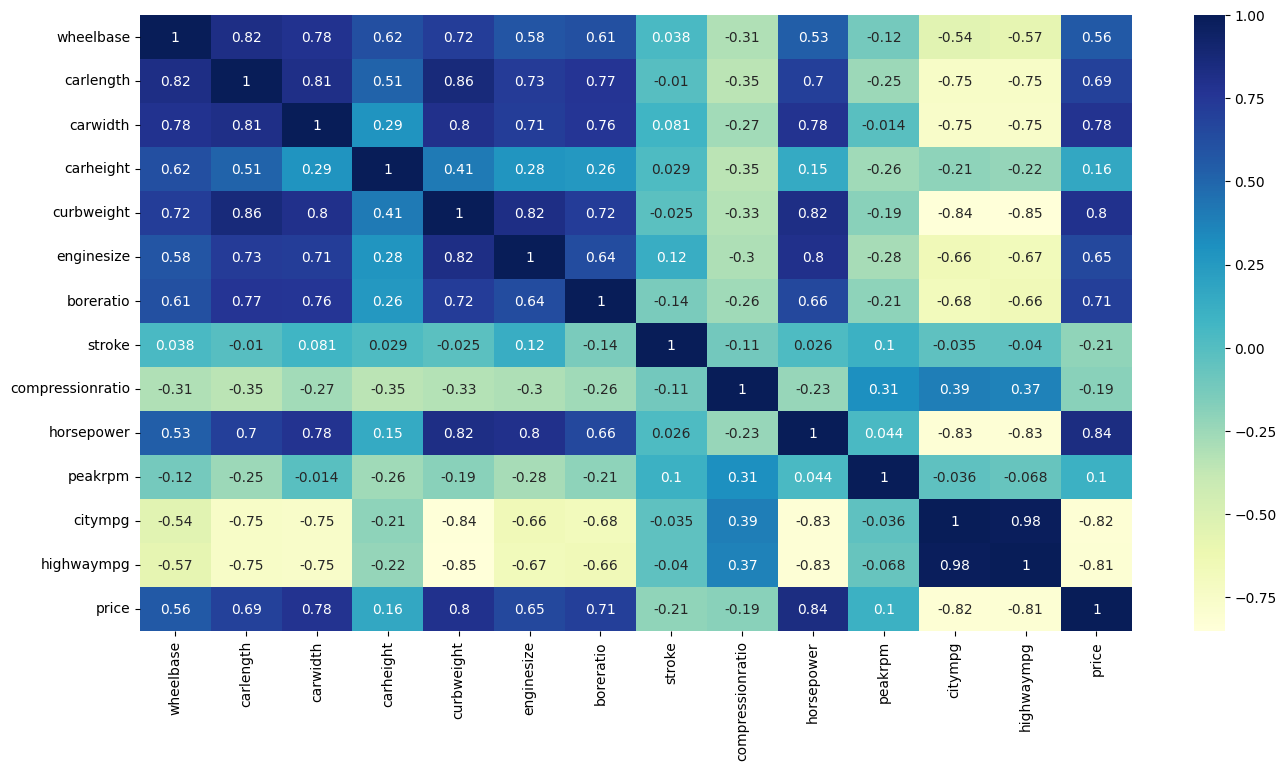

In [49]:
#Let's check the correlation coefficients of all numerical variables except categorical variables to see which variables are highly correlated

plt.figure(figsize = (16, 8))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

***Create X_train and y_train***

In [50]:
# Popping out the 'price' column for y_train
y_train = df_train.pop('price') 
# Creating X_train
X_train = df_train

In [51]:
y_train.head()

38     0.215015
98     0.165932
180    0.597644
35     0.110583
61     0.302042
Name: price, dtype: float64

In [52]:
X_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,...,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,...,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,...,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,...,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Creating the model using scikit learn 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

We have 55 feature columns in our datasets. We are selecting 20 columns by the RFE.

In [58]:
# RFE with the number of variables 20. It will select top 20 features.
rfe = RFE(lm)
ref = rfe.fit(X_train, y_train)

In [59]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 18),
 ('aspiration', True, 1),
 ('doornumber', False, 28),
 ('drivewheel', False, 4),
 ('enginelocation', False, 29),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 26),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 22),
 ('highwaympg', False, 10),
 ('symboling(-1)', False, 19),
 ('symboling(0)', False, 16),
 ('symboling(1)', False, 11),
 ('symboling(2)', False, 23),
 ('symboling(3)', False, 25),
 ('carbody(hardtop)', True, 1),
 ('carbody(hatchback)', True, 1),
 ('carbody(sedan)', True, 1),
 ('carbody(wagon)', True, 1),
 ('enginetype(l)', True, 1),
 ('enginetype(ohc)', True, 1),
 ('enginetype(ohcv)', False, 15),
 ('enginetype(rotor)', True, 1),
 ('cylindernumber(four)', False, 17),
 ('cylindernumber(six)', False, 20),
 ('cylindernumber(two)', True, 1),
 ('fuelsyst

In [60]:
# The top 20 features selected by the RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['aspiration', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'carbody(hardtop)',
       'carbody(hatchback)', 'carbody(sedan)', 'carbody(wagon)',
       'enginetype(l)', 'enginetype(ohc)', 'enginetype(rotor)',
       'cylindernumber(two)', 'fuelsystem(4bbl)', 'CarCompany(audi)',
       'CarCompany(bmw)', 'CarCompany(isuzu)', 'CarCompany(mercury)',
       'CarCompany(mitsubishi)', 'CarCompany(peugeot)', 'CarCompany(porsche)',
       'CarCompany(saab)', 'CarCompany(volvo)'],
      dtype='object')

In [61]:
# Not selected features by RFE
X_train.columns[~rfe.support_]

Index(['fueltype', 'doornumber', 'drivewheel', 'enginelocation', 'carlength',
       'enginesize', 'compressionratio', 'citympg', 'highwaympg',
       'symboling(-1)', 'symboling(0)', 'symboling(1)', 'symboling(2)',
       'symboling(3)', 'enginetype(ohcv)', 'cylindernumber(four)',
       'cylindernumber(six)', 'fuelsystem(2bbl)', 'fuelsystem(mpfi)',
       'fuelsystem(spfi)', 'CarCompany(chevrolet)', 'CarCompany(dodge)',
       'CarCompany(honda)', 'CarCompany(mazda)', 'CarCompany(nissan)',
       'CarCompany(plymouth)', 'CarCompany(toyota)', 'CarCompany(volkswagen)'],
      dtype='object')

In [62]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rfe_cols]
X_train_1.head()

,aspiration,wheelbase,carwidth,carheight,curbweight,boreratio,stroke,horsepower,peakrpm,carbody(hardtop),...,fuelsystem(4bbl),CarCompany(audi),CarCompany(bmw),CarCompany(isuzu),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(peugeot),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
38,1,0.358696,0.301887,0.409091,0.318213,0.373016,1.000000,0.226087,0.833333,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0.307971,0.037736,0.409091,0.127962,0.373016,0.677778,0.078261,0.333333,1,...,0,0,0,0,0,0,0,0,0,0
180,1,0.648551,0.547170,0.481818,0.888287,0.468254,0.744444,0.834783,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0.358696,0.075472,0.518182,0.129316,0.182540,0.811111,0.139130,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
61,1,0.442029,0.547170,0.445455,0.383209,0.563492,0.788889,0.208696,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train_1)

In [64]:
# Creating model
lr_1 = sm.OLS(y_train, X_train_sm_1)

In [65]:
# Fit the model
lr_model_1 = lr_1.fit()

In [66]:
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     65.78
Date:                Tue, 21 May 2024   Prob (F-statistic):           9.97e-35
Time:                        22:18:27   Log-Likelihood:                 141.15
No. Observations:                  86   AIC:                            -230.3
Df Residuals:                      60   BIC:                            -166.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,enginetype(l),inf
23,CarCompany(peugeot),inf
16,cylindernumber(two),inf
15,enginetype(rotor),inf
1,wheelbase,71.02
14,enginetype(ohc),61.38
6,stroke,59.26
7,horsepower,43.36
5,boreratio,42.71
0,aspiration,31.27


In [68]:
# Removing wheelbase
X_train_2 = X_train_1.drop('wheelbase',axis=1)

In [69]:
# Adding constant 
X_train_sm_2 = sm.add_constant(X_train_2)
# Creating and fitting the model
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     65.34
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.52e-35
Time:                        22:18:51   Log-Likelihood:                 138.49
No. Observations:                  86   AIC:                            -227.0
Df Residuals:                      61   BIC:                            -165.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [70]:
# Create VIF for Model-2
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginetype(l),inf
22,CarCompany(peugeot),inf
15,cylindernumber(two),inf
14,enginetype(rotor),inf
13,enginetype(ohc),60.15
5,stroke,59.10
4,boreratio,42.23
6,horsepower,42.16
0,aspiration,31.15
3,curbweight,29.33


In [71]:
# Removing boreratio
X_train_3 = X_train_2.drop('boreratio',axis=1)

In [72]:
# Adding constant 
X_train_sm_3 = sm.add_constant(X_train_3)
# Creating and fitting the model
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     62.11
Date:                Tue, 21 May 2024   Prob (F-statistic):           2.23e-34
Time:                        22:19:14   Log-Likelihood:                 133.97
No. Observations:                  86   AIC:                            -219.9
Df Residuals:                      62   BIC:                            -161.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [73]:
# Create VIF for Model-3
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
21,CarCompany(peugeot),inf
14,cylindernumber(two),inf
13,enginetype(rotor),inf
4,stroke,55.81
12,enginetype(ohc),41.18
5,horsepower,34.69
3,curbweight,29.12
0,aspiration,26.30
1,carwidth,23.97


In [74]:
# Removing fuelsystem(4bbl)
X_train_4 = X_train_3.drop('fuelsystem(4bbl)',axis=1)

In [75]:
# Adding constant 
X_train_sm_4 = sm.add_constant(X_train_4)
# Creating model
lr_model_4 = sm.OLS(y_train, X_train_sm_4).fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     58.77
Date:                Tue, 21 May 2024   Prob (F-statistic):           8.35e-34
Time:                        22:19:35   Log-Likelihood:                 129.21
No. Observations:                  86   AIC:                            -212.4
Df Residuals:                      63   BIC:                            -156.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [76]:
# Create VIF for Model-4
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
20,CarCompany(peugeot),inf
14,cylindernumber(two),inf
13,enginetype(rotor),inf
4,stroke,54.50
12,enginetype(ohc),39.15
5,horsepower,31.16
3,curbweight,28.37
0,aspiration,26.07
1,carwidth,23.91


In [77]:
# Removing enginetype(rotor)
X_train_5 = X_train_4.drop('enginetype(rotor)',axis=1)

In [78]:
# Adding constant 
X_train_sm_5 = sm.add_constant(X_train_5)
# Creating model
lr_model_5 = sm.OLS(y_train, X_train_sm_5).fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     58.77
Date:                Tue, 21 May 2024   Prob (F-statistic):           8.35e-34
Time:                        22:19:59   Log-Likelihood:                 129.21
No. Observations:                  86   AIC:                            -212.4
Df Residuals:                      63   BIC:                            -156.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [79]:
# Create VIF for Model-5
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
19,CarCompany(peugeot),inf
4,stroke,54.50
12,enginetype(ohc),39.15
5,horsepower,31.16
3,curbweight,28.37
0,aspiration,26.07
1,carwidth,23.91
2,carheight,16.45
9,carbody(sedan),11.51


In [80]:
# Removing cylindernumber(two)
X_train_6 = X_train_5.drop('cylindernumber(two)',axis=1)

In [81]:
# Adding constant 
X_train_sm_6 = sm.add_constant(X_train_6)
# Creating model
lr_model_6 = sm.OLS(y_train, X_train_sm_6).fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     61.56
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.68e-34
Time:                        22:20:17   Log-Likelihood:                 128.56
No. Observations:                  86   AIC:                            -213.1
Df Residuals:                      64   BIC:                            -159.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [82]:
# Create VIF for Model-6
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype(l),inf
18,CarCompany(peugeot),inf
4,stroke,54.50
12,enginetype(ohc),36.09
5,horsepower,28.89
3,curbweight,28.01
0,aspiration,25.53
1,carwidth,22.67
2,carheight,16.05
9,carbody(sedan),11.31


In [83]:
# Removing enginetype(l)
X_train_7 = X_train_6.drop('enginetype(l)',axis=1)

In [84]:
# Adding constant 
X_train_sm_7 = sm.add_constant(X_train_7)
# Creating model
lr_model_7 = sm.OLS(y_train, X_train_sm_7).fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     61.56
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.68e-34
Time:                        22:20:36   Log-Likelihood:                 128.56
No. Observations:                  86   AIC:                            -213.1
Df Residuals:                      64   BIC:                            -159.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [85]:
# Create VIF for Model-7
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,stroke,54.50
11,enginetype(ohc),36.09
5,horsepower,28.89
3,curbweight,28.01
0,aspiration,25.53
1,carwidth,22.67
2,carheight,16.05
9,carbody(sedan),11.31
8,carbody(hatchback),10.42
6,peakrpm,8.29


In [86]:
# Removing carwidth
X_train_8 = X_train_7.drop('carwidth',axis=1)

In [87]:
# Adding constant 
X_train_sm_8 = sm.add_constant(X_train_8)
# Creating model
lr_model_8 = sm.OLS(y_train, X_train_sm_8).fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     61.47
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.51e-34
Time:                        22:21:01   Log-Likelihood:                 125.87
No. Observations:                  86   AIC:                            -209.7
Df Residuals:                      65   BIC:                            -158.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [88]:
# Create VIF for Model-8
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,41.16
10,enginetype(ohc),31.31
4,horsepower,28.89
0,aspiration,25.32
2,curbweight,24.71
1,carheight,16.03
8,carbody(sedan),10.59
7,carbody(hatchback),9.67
5,peakrpm,7.16
9,carbody(wagon),4.82


In [89]:
# Removing CarCompany(isuzu)
X_train_9 = X_train_8.drop('CarCompany(isuzu)',axis=1)

In [90]:
# Adding constant 
X_train_sm_9 = sm.add_constant(X_train_9)
# Creating model
lr_model_9 = sm.OLS(y_train, X_train_sm_9).fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     61.59
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.34e-34
Time:                        22:21:26   Log-Likelihood:                 123.24
No. Observations:                  86   AIC:                            -206.5
Df Residuals:                      66   BIC:                            -157.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [91]:
# Create VIF for Model-9
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,40.39
10,enginetype(ohc),30.30
4,horsepower,28.88
0,aspiration,25.10
2,curbweight,23.83
1,carheight,15.66
8,carbody(sedan),10.46
7,carbody(hatchback),9.58
5,peakrpm,7.12
9,carbody(wagon),4.81


In [92]:
# Removing CarCompany(peugeot)
X_train_10 = X_train_9.drop('CarCompany(peugeot)',axis=1)

In [93]:
# Adding constant 
X_train_sm_10 = sm.add_constant(X_train_10)
# Creating model
lr_model_10 = sm.OLS(y_train, X_train_sm_10).fit()
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     62.92
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.22e-35
Time:                        22:21:47   Log-Likelihood:                 121.30
No. Observations:                  86   AIC:                            -204.6
Df Residuals:                      67   BIC:                            -158.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [94]:
# Create VIF for Model-10
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,39.57
10,enginetype(ohc),26.91
0,aspiration,25.06
4,horsepower,24.24
2,curbweight,21.31
1,carheight,15.52
8,carbody(sedan),10.34
7,carbody(hatchback),9.44
5,peakrpm,7.11
9,carbody(wagon),4.78


In [95]:
# Removing aspiration
X_train_11 = X_train_10.drop('aspiration',axis=1)

In [96]:
# Adding constant 
X_train_sm_11 = sm.add_constant(X_train_11)
# Creating model
lr_model_11 = sm.OLS(y_train, X_train_sm_11).fit()
print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     50.01
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.10e-31
Time:                        22:22:08   Log-Likelihood:                 109.16
No. Observations:                  86   AIC:                            -182.3
Df Residuals:                      68   BIC:                            -138.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [97]:
# Create VIF for Model-11
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,36.67
3,horsepower,23.73
9,enginetype(ohc),20.12
1,curbweight,19.16
0,carheight,15.30
7,carbody(sedan),9.03
6,carbody(hatchback),7.77
4,peakrpm,6.06
8,carbody(wagon),4.59
16,CarCompany(volvo),2.77


In [98]:
# Removing enginetype(ohc)
X_train_12 = X_train_11.drop('enginetype(ohc)',axis=1)

In [99]:
# Adding constant 
X_train_sm_12 = sm.add_constant(X_train_12)
# Creating model
lr_model_12 = sm.OLS(y_train, X_train_sm_12).fit()
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     45.17
Date:                Tue, 21 May 2024   Prob (F-statistic):           3.64e-30
Time:                        22:22:32   Log-Likelihood:                 102.17
No. Observations:                  86   AIC:                            -170.3
Df Residuals:                      69   BIC:                            -128.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [100]:
# Create VIF for Model-12
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,20.88
1,curbweight,19.07
3,horsepower,15.18
0,carheight,15.08
7,carbody(sedan),7.64
6,carbody(hatchback),6.14
4,peakrpm,5.54
8,carbody(wagon),4.55
15,CarCompany(volvo),2.06
14,CarCompany(saab),1.96


In [101]:
# Find y_train prediction
y_train_pred = lr_model_12.predict(X_train_sm_12)

In [102]:
# Residual
residual = y_train - y_train_pred

<Axes: ylabel='Density'>

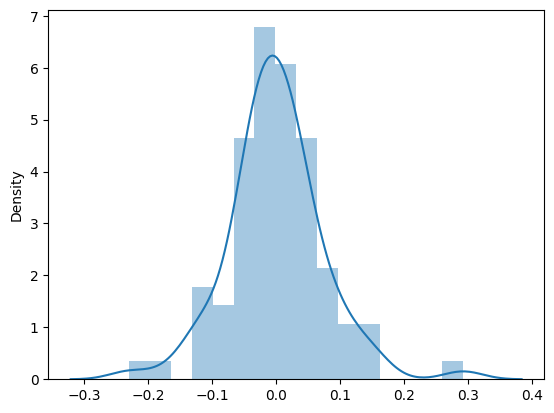

In [103]:
# Distribution of residuals or error terms
sns.distplot(residual)

Text(0, 0.5, 'residual')

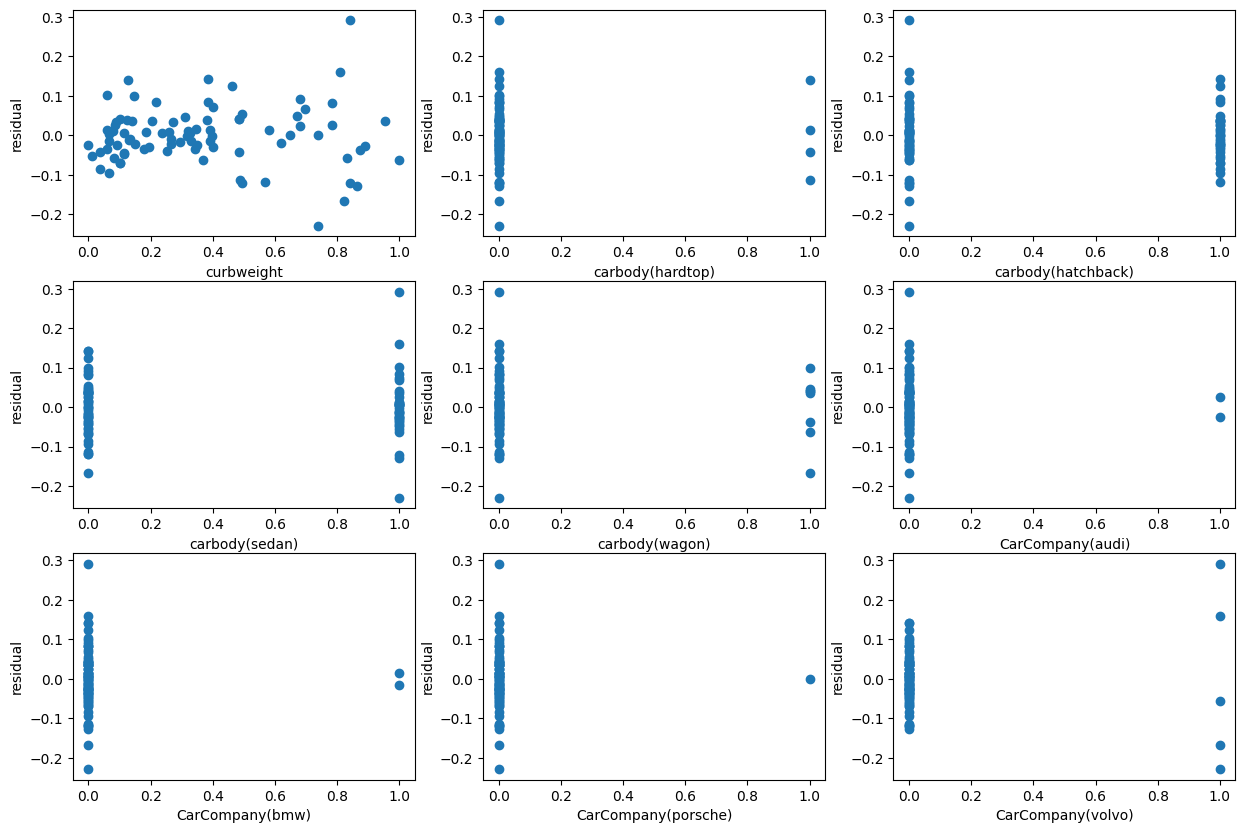

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.scatter(X_train_12['curbweight'], residual)
plt.xlabel('curbweight')
plt.ylabel('residual')
plt.subplot(3,3,2)
plt.scatter(X_train_12['carbody(hardtop)'], residual)
plt.xlabel('carbody(hardtop)')
plt.ylabel('residual')
plt.subplot(3,3,3)
plt.scatter(X_train_12['carbody(hatchback)'], residual)
plt.xlabel('carbody(hatchback)')
plt.ylabel('residual')
plt.subplot(3,3,4)
plt.scatter(X_train_12['carbody(sedan)'], residual)
plt.xlabel('carbody(sedan)')
plt.ylabel('residual')
plt.subplot(3,3,5)
plt.scatter(X_train_12['carbody(wagon)'], residual)
plt.xlabel('carbody(wagon)')
plt.ylabel('residual')
plt.subplot(3,3,6)
plt.scatter(X_train_12['CarCompany(audi)'], residual)
plt.xlabel('CarCompany(audi)')
plt.ylabel('residual')
plt.subplot(3,3,7)
plt.scatter(X_train_12['CarCompany(bmw)'], residual)
plt.xlabel('CarCompany(bmw)')
plt.ylabel('residual')
plt.subplot(3,3,8)
plt.scatter(X_train_12['CarCompany(porsche)'], residual)
plt.xlabel('CarCompany(porsche)')
plt.ylabel('residual')
plt.subplot(3,3,9)
plt.scatter(X_train_12['CarCompany(volvo)'], residual)
plt.xlabel('CarCompany(volvo)')
plt.ylabel('residual')

In [105]:
# Scale the test set variables with min-max scaler

# Transform the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
22,1,1,0,1,1,0.257246,0.233886,0.037736,0.181818,0.038592,...,0,0,0,0,0,0,0,0,0,0
181,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.901828,...,0,0,0,0,0,0,0,1,0,0
171,1,1,0,0,1,0.427536,0.581952,0.377358,0.290909,0.605958,...,0,0,0,0,0,0,0,1,0,0
107,1,1,1,0,1,0.771739,0.775322,0.905660,0.718182,0.813135,...,0,0,0,1,0,0,0,0,0,0
150,1,1,0,1,1,0.329710,0.259669,0.000000,0.518182,0.112390,...,0,0,0,0,0,0,0,1,0,0


In [106]:
df_test.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
count,37.0,37.0,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.0,37.0,37.000000,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000
mean,1.0,1.0,0.594595,0.621622,1.0,0.427438,0.544672,0.380418,0.493120,0.439880,...,0.0,0.0,0.108108,0.054054,0.0,0.0,0.054054,0.162162,0.108108,0.081081
std,0.0,0.0,0.497743,0.491672,0.0,0.166974,0.185558,0.332338,0.203859,0.285150,...,0.0,0.0,0.314800,0.229243,0.0,0.0,0.229243,0.373684,0.314800,0.276725
min,1.0,1.0,0.000000,0.000000,1.0,0.170290,0.208103,-0.339623,0.072727,0.037238,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,0.000000,0.000000,1.0,0.286232,0.421731,0.113208,0.409091,0.138795,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.0,1.000000,1.000000,1.0,0.387681,0.567219,0.377358,0.481818,0.410291,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.0,1.000000,1.000000,1.0,0.500000,0.709024,0.622642,0.627273,0.635748,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,1.0,1.0,1.000000,1.000000,1.0,0.815217,0.813996,1.000000,0.936364,0.901828,...,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


***Create X_test and y_test***

In [107]:
# Popping out the 'price' column for y_test
y_test = df_test.pop('price')

# Creating X_test
X_test = df_test

In [108]:
# Taking only the columns from the final model.
X_test = X_test[X_train_12.columns]
X_test.head()

,carheight,curbweight,stroke,horsepower,peakrpm,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
22,0.181818,0.038592,0.611111,0.069565,0.583333,0,1,0,0,0,0,0,0,0,0,0
181,0.481818,0.901828,0.744444,0.834783,0.333333,0,0,0,1,0,0,0,0,0,0,0
171,0.290909,0.605958,0.911111,0.486957,0.000000,0,1,0,0,0,0,0,0,0,0,0
107,0.718182,0.813135,0.566667,0.321739,0.166667,0,0,1,0,0,0,0,0,0,0,0
150,0.518182,0.112390,0.388889,0.017391,0.000000,0,1,0,0,0,0,0,0,0,0,0


In [109]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,carheight,curbweight,stroke,horsepower,peakrpm,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(porsche),CarCompany(saab),CarCompany(volvo)
22,1.0,0.181818,0.038592,0.611111,0.069565,0.583333,0,1,0,0,0,0,0,0,0,0,0
181,1.0,0.481818,0.901828,0.744444,0.834783,0.333333,0,0,0,1,0,0,0,0,0,0,0
171,1.0,0.290909,0.605958,0.911111,0.486957,0.000000,0,1,0,0,0,0,0,0,0,0,0
107,1.0,0.718182,0.813135,0.566667,0.321739,0.166667,0,0,1,0,0,0,0,0,0,0,0
150,1.0,0.518182,0.112390,0.388889,0.017391,0.000000,0,1,0,0,0,0,0,0,0,0,0


In [110]:
# Predict the model on the test set
y_test_pred = lr_model_12.predict(X_test_sm)

In [111]:
# Evaluate the model with r-squared on the test set
r2 = r2_score(y_test, y_test_pred)
r2

0.8254657838151552

Text(0, 0.5, 'y_test_pred')

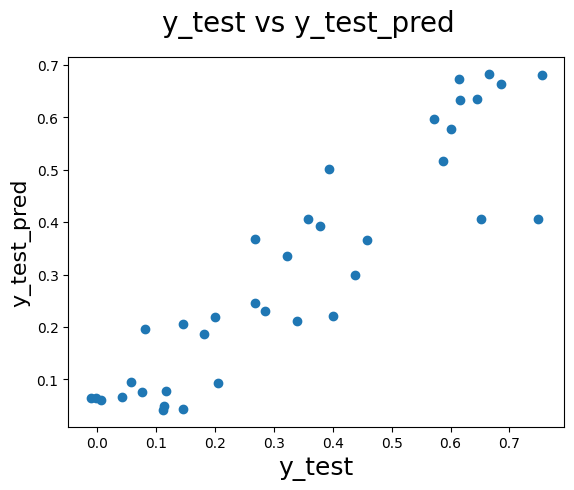

In [112]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)  